In [20]:
!pip install ta
!pip install yfinance
!pip install mplfinance

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # To fetch Ethereum price data
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Step 1: Fetch Ethereum price data for the specified date range
ethereum_data = yf.download("ETH-USD", start="2024-11-02", end="2024-11-09", interval="1h")  # Hourly data

# Step 2: Flatten the multi-level column index
ethereum_data.columns = ethereum_data.columns.droplevel(1)

# Step 2: Check the column names
print("Column names:", ethereum_data.columns)  # Debugging

# Step 3: Ensure 'Close' is a 1D Series
ethereum_data['Close'] = ethereum_data['Close'].squeeze()  # Convert to 1D Series
print("Type of 'Close' column:", type(ethereum_data['Close']))  # Debugging
print("Shape of 'Close' column:", ethereum_data['Close'].shape)  # Debugging








[*********************100%***********************]  1 of 1 completed

Column names: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Type of 'Close' column: <class 'pandas.core.series.Series'>
Shape of 'Close' column: (168,)


In [22]:
# Step 4: Calculate RSI
rsi_indicator = RSIIndicator(ethereum_data['Close'], window=14)  # 14-period RSI
ethereum_data['RSI'] = rsi_indicator.rsi()


In [23]:
# Step 5: Calculate Bollinger Bands
bollinger_bands = BollingerBands(ethereum_data['Close'], window=20, window_dev=2)  # 20-period Bollinger Bands
ethereum_data['Bollinger_High'] = bollinger_bands.bollinger_hband()
ethereum_data['Bollinger_Low'] = bollinger_bands.bollinger_lband()
ethereum_data['Bollinger_Mid'] = bollinger_bands.bollinger_mavg()  # Middle band (20-period SMA)

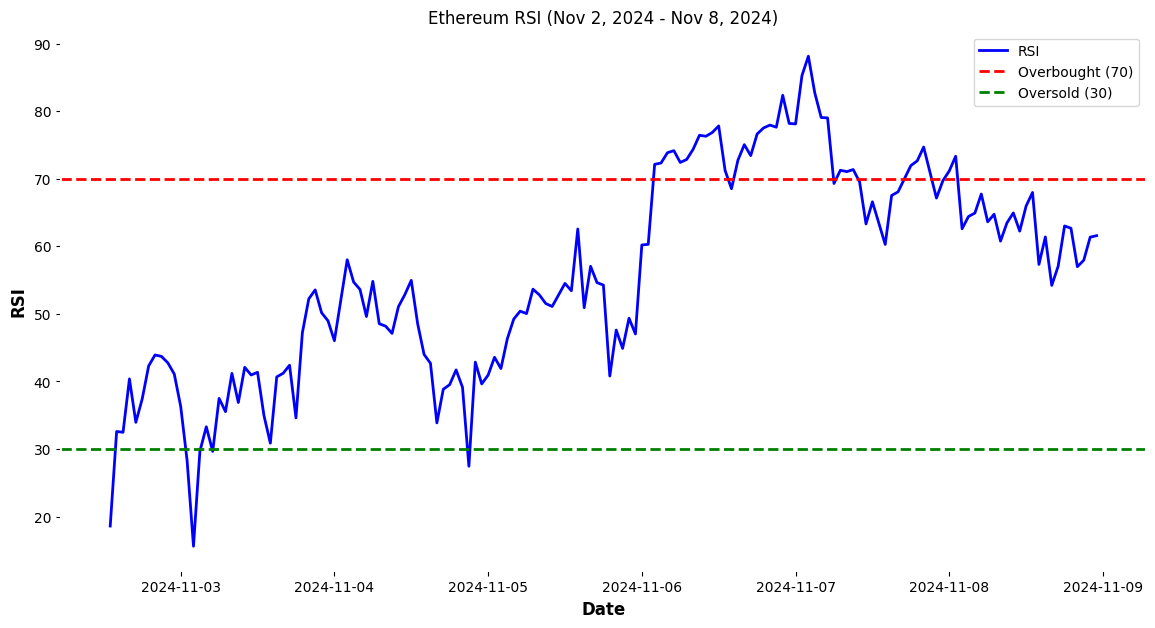

In [24]:
# Step 6: Plot RSI Chart
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data.index, ethereum_data['RSI'], color='blue', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Ethereum RSI (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

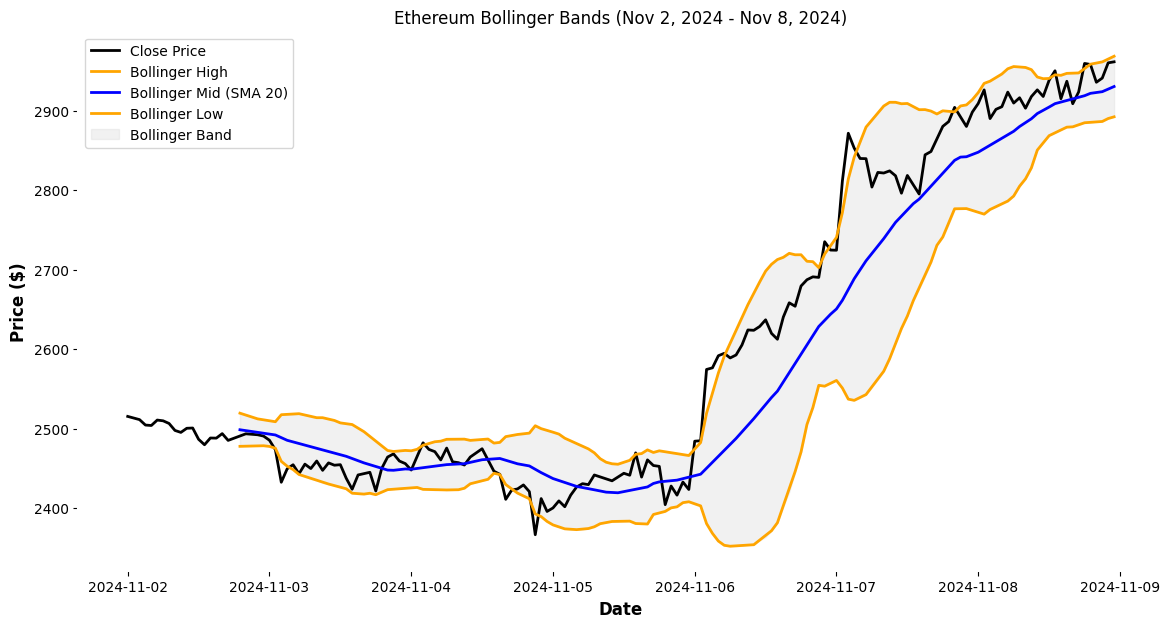

In [25]:
# Step 7: Plot Bollinger Bands Chart
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data.index, ethereum_data['Close'], color='black', label='Close Price')
plt.plot(ethereum_data.index, ethereum_data['Bollinger_High'], color='orange', label='Bollinger High')
plt.plot(ethereum_data.index, ethereum_data['Bollinger_Mid'], color='blue', label='Bollinger Mid (SMA 20)')
plt.plot(ethereum_data.index, ethereum_data['Bollinger_Low'], color='orange', label='Bollinger Low')
plt.fill_between(ethereum_data.index, ethereum_data['Bollinger_High'], ethereum_data['Bollinger_Low'], color='lightgray', alpha=0.3, label='Bollinger Band')
plt.title('Ethereum Bollinger Bands (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


Type of 'Close' column: <class 'pandas.core.series.Series'>
Shape of 'Close' column: (168,)


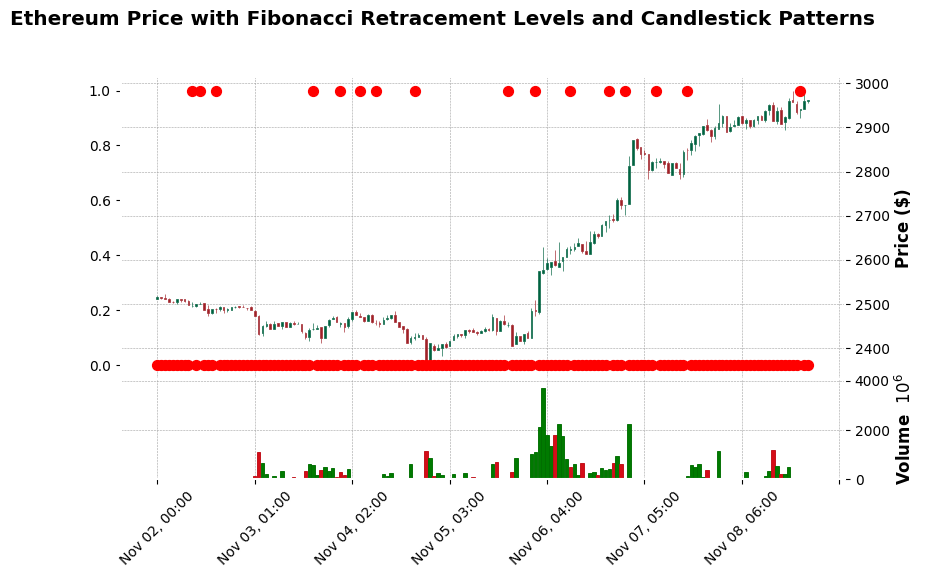

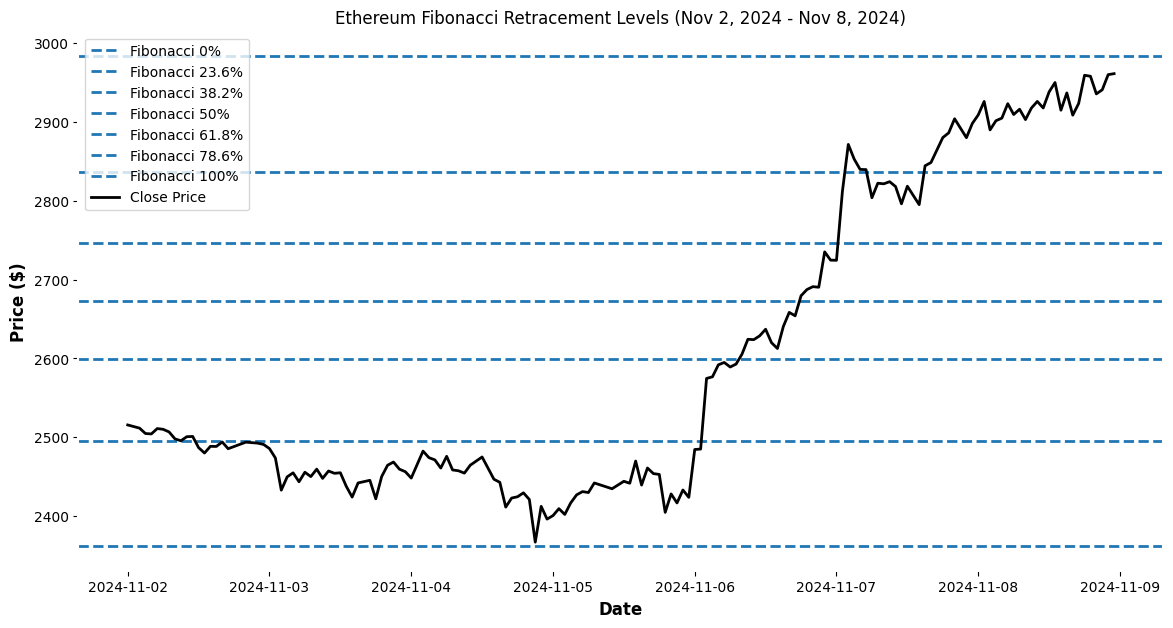

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # To fetch Ethereum price data
import mplfinance as mpf  # For candlestick charts
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Step 1: Fetch Ethereum price data for the specified date range
ethereum_data = yf.download("ETH-USD", start="2024-11-02", end="2024-11-09", interval="1h")  # Hourly data

# Step 2: Flatten the multi-level column index
ethereum_data.columns = ethereum_data.columns.droplevel(1)  # Remove the 'Ticker' level

# Step 3: Ensure 'Close' is a 1D Series
print("Type of 'Close' column:", type(ethereum_data['Close']))  # Debugging
print("Shape of 'Close' column:", ethereum_data['Close'].shape)  # Debugging

# Step 4: Calculate Fibonacci Retracement Levels
high = ethereum_data['High'].max()  # Highest price in the dataset
low = ethereum_data['Low'].min()    # Lowest price in the dataset
diff = high - low  # Price range

# Key Fibonacci levels
fib_levels = {
    '0%': high,
    '23.6%': high - 0.236 * diff,
    '38.2%': high - 0.382 * diff,
    '50%': high - 0.5 * diff,
    '61.8%': high - 0.618 * diff,
    '78.6%': high - 0.786 * diff,
    '100%': low
}

# Step 5: Identify Candlestick Patterns (Example: Doji)
def is_doji(row):
    """Identify a Doji candlestick pattern."""
    body = abs(row['Close'] - row['Open'])
    wick = row['High'] - row['Low']
    return body <= 0.1 * wick  # Body is less than 10% of the total wick

ethereum_data['Doji'] = ethereum_data.apply(is_doji, axis=1)

# Step 6: Plot Candlestick Chart with Fibonacci Levels and Candlestick Patterns
# Create additional plots for Fibonacci levels and Doji patterns
apds = [
    mpf.make_addplot(ethereum_data['Doji'].astype(int), type='scatter', markersize=50, marker='o', color='red', panel=0),  # Highlight Doji patterns
]

# Plot the candlestick chart
mpf.plot(
    ethereum_data,
    type='candle',
    style='charles',
    title='Ethereum Price with Fibonacci Retracement Levels and Candlestick Patterns',
    ylabel='Price ($)',
    volume=True,
    addplot=apds,
    figratio=(14, 8),
    panel_ratios=(3, 1)  # Main chart and volume panel
)

# Overlay Fibonacci levels on the chart
plt.figure(figsize=(14, 7))
for level, price in fib_levels.items():
    plt.axhline(price, linestyle='--', label=f'Fibonacci {level}')
plt.plot(ethereum_data.index, ethereum_data['Close'], color='black', label='Close Price')
plt.title('Ethereum Fibonacci Retracement Levels (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

In [27]:
# Calculate the 7-day moving average
ethereum_data['7_day_MA'] = ethereum_data['Close'].rolling(window=7).mean()

# Display the data with the moving average
print(ethereum_data[['Close', '7_day_MA']])

Price                            Close     7_day_MA
Datetime                                           
2024-11-02 00:00:00+00:00  2515.539307          NaN
2024-11-02 01:00:00+00:00  2514.020020          NaN
2024-11-02 02:00:00+00:00  2511.505615          NaN
2024-11-02 03:00:00+00:00  2504.667480          NaN
2024-11-02 04:00:00+00:00  2504.116211          NaN
...                                ...          ...
2024-11-08 19:00:00+00:00  2958.232422  2936.111851
2024-11-08 20:00:00+00:00  2935.851318  2934.048793
2024-11-08 21:00:00+00:00  2941.114746  2937.756696
2024-11-08 22:00:00+00:00  2960.278320  2941.069266
2024-11-08 23:00:00+00:00  2961.552979  2948.603237

[168 rows x 2 columns]


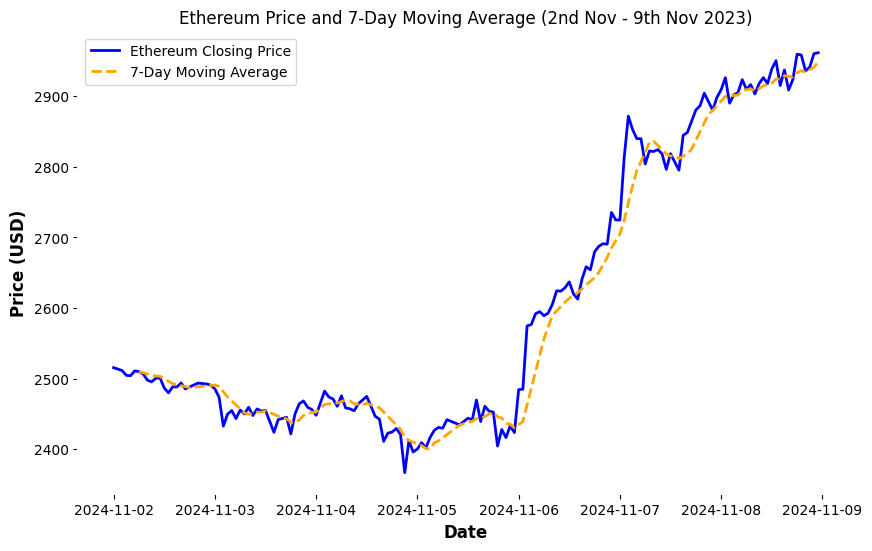

In [28]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ethereum_data['Close'], label='Ethereum Closing Price', color='blue')
plt.plot(ethereum_data['7_day_MA'], label='7-Day Moving Average', color='orange', linestyle='--')

# Add title and labels
plt.title('Ethereum Price and 7-Day Moving Average (2nd Nov - 9th Nov 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.grid()
plt.show()